<a href="https://colab.research.google.com/github/MathewsJosh/Topicos-Computacao-Cientifica-II/blob/main/Aula_08_AproximacoesSucessivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecção de bordas com *snakes*

Snakes são estruturas criadas para delinear o contorno de um objeto a partir de uma imagem 2D ruidosa. Sendo muito popular em visão computacional e amplamente utilizado em aplicações de rastreamento de objetos, reconhecimento de formas, segmentação, detecção de bordas e correspondência estéreo.

O código abaixo faz parte da biblioteca [scickit-learn](https://scikit-image.org/docs/dev/auto_examples/edges/plot_active_contours.html)

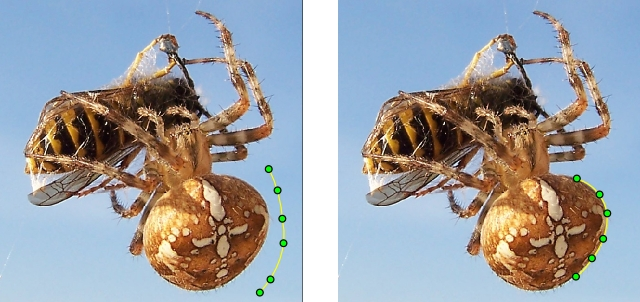

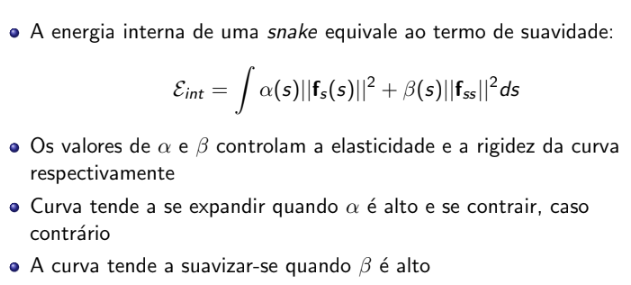

###Active Contour ([snakes](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.active_contour))

Parameters
image(N, M) or (N, M, 3) ndarray - Input image.

*   snake(N, 2) ndarray - Initial snake coordinates. For periodic boundary conditions, endpoints must not be duplicated.
*   alphafloat, optional - Snake length shape parameter. Higher values makes snake contract faster.
*   betafloat, optional - Snake smoothness shape parameter. Higher values makes snake smoother.
*   w_linefloat, optional - Controls attraction to brightness. Use negative values to attract toward dark regions.
*   w_edgefloat, optional - Controls attraction to edges. Use negative values to repel snake from edges.
*   gammafloat, optional - Explicit time stepping parameter.
*   max_px_movefloat, optional - Maximum pixel distance to move per iteration.
*   max_num_iterint, optional - Maximum iterations to optimize snake shape.
*   convergencefloat, optional - Convergence criteria.
*   boundary_conditionstring, optional - Boundary conditions for the contour. Can be one of ‘periodic’, ‘free’, ‘fixed’, ‘free-fixed’, or ‘fixed-free’. ‘periodic’ attaches the two ends of the snake, ‘fixed’ holds the end-points in place, and ‘free’ allows free movement of the ends. ‘fixed’ and ‘free’ can be combined by parsing ‘fixed-free’, ‘free-fixed’. Parsing ‘fixed-fixed’ or ‘free-free’ yields same behaviour as ‘fixed’ and ‘free’, respectively.
*   coordinates{‘rc’}, optional - This option remains for compatibility purpose only and has no effect. It was introduced in 0.16 with the 'xy' option, but since 0.18, only the 'rc' option is valid. Coordinates must be set in a row-column format.
*   Returns - snake(N, 2) ndarray - Optimised snake, same shape as input parameter.


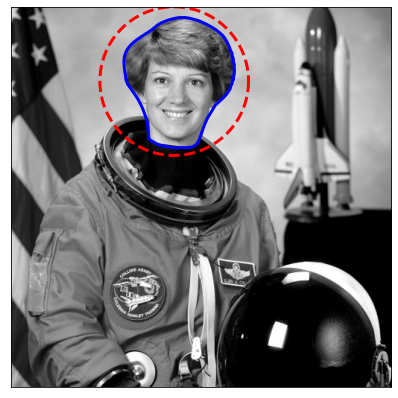

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

512 512


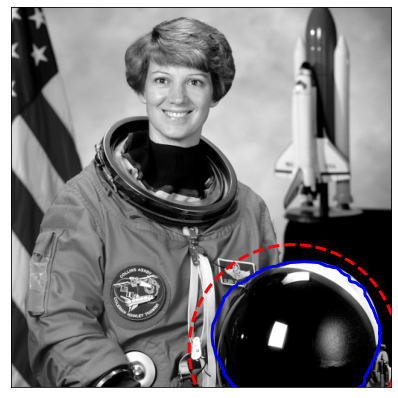

In [ ]:
#Teste
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

img = data.astronaut()
img = rgb2gray(img)
width,height = img.shape
print(width,height)

s = np.linspace(0, 2*np.pi, 350)
r = 460 + 140*np.sin(s) #Y 
c = 380 + 140*np.cos(s) #X
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=9.01, beta=20000, gamma=0.000009)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

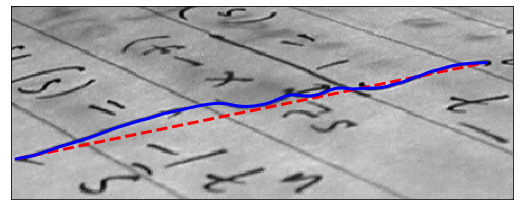

In [ ]:
img = data.text()

r = np.linspace(136, 50, 100)
c = np.linspace(5, 424, 100)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 1, preserve_range=False),
                       init, boundary_condition='fixed',
                       alpha=0.1, beta=1.0, w_line=-5, w_edge=0, gamma=0.1)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

(172, 448)


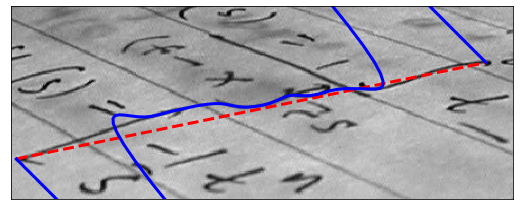

In [ ]:
#Teste
img = data.text()
print(img.shape)

r = np.linspace(136, 50, 100) #Y
c = np.linspace(5, 424, 100) #X
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 1, preserve_range=False),
                       init, boundary_condition='fixed',
                       alpha=0.1, beta=1.0, w_line=-5, w_edge=0, gamma=5.1)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()